## Camera vimba test

- how to connect Camera to Windows PC see documentation
- this is about testing vimba lib for python 
- more information see Vimba_Python_Manual 

### Installation 
Die Jupyter Datei muss im Source Ordner von vimba python liegen, damit die setup.py gefunden werden kann 

In [9]:
#einmalig ausführen
#!{sys.executable} -m  pip install .
#!{sys.executable} -m pip install opencv-python

In [10]:
from vimba import *
import cv2
from matplotlib import pyplot as plt
import numpy as np

- Acquire a single frame
- Convert the pixel format to Mono8
- Store it using opencv-python

In [11]:
#Bei Errormeldung -7, einfach nochmal Kamera turn off turn on 
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    with cams [0] as cam:
        frame = cam.get_frame ()
    frame.convert_pixel_format(PixelFormat.Mono8)
    im = cv2.imwrite('frame.jpg', frame.as_opencv_image ())
    

fetch image convert to np_array and show in jupyter

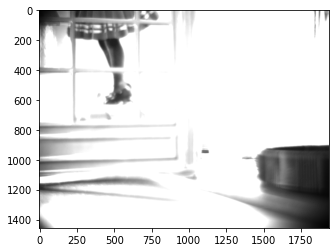

In [29]:
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    with cams [0] as cam:
        frame = cam.get_frame ()
    frame.convert_pixel_format(PixelFormat.Mono8)
    np_a = frame.as_numpy_ndarray()
plt.imshow(np_a, cmap='gray')
plt.show()
   

save np_array so it can be loaded in the data analysis jupyter

In [31]:
with open('test.npy', 'wb') as f:
    np.save(f, np_a)

print all features of the first detected Interface

In [30]:
with Vimba.get_instance () as vimba:
    inters = vimba.get_all_interfaces ()
    with inters [0] as interface:
        for feat in interface.get_all_features ():
            print(feat)

EnumFeature(name=DeviceAccessStatus)
IntFeature(name=DeviceCount, value=0, range=(0, 4294967295), increment=1)
StringFeature(name=DeviceDisplayName)
StringFeature(name=DeviceDriverPath)
StringFeature(name=DeviceID)
StringFeature(name=DeviceLocation)
StringFeature(name=DeviceModelName)
IntFeature(name=DeviceSelector)
EnumFeature(name=DeviceType)
CommandFeature(name=DeviceUpdateList)
StringFeature(name=DeviceVendorName)
StringFeature(name=InterfaceDisplayName, value=Vimba USB Interface, max_length=256)
StringFeature(name=InterfaceID, value=VimbaUSBInterface_0x0, max_length=256)
EnumFeature(name=InterfaceType, value=USB3)
